In [246]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import missingno as msno #for visualisation of missing values
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')

In [247]:
df = pd.read_csv('retail_data.csv')

In [248]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df[df['Description'].str.contains("[?]",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,NaN,United Kingdom
38261,539494,21479,?,752,12/20/2010 10:36,0.0,NaN,United Kingdom
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,NaN,United Kingdom
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
514649,579734,84859C,wet?,-153,11/30/2011 14:25,0.0,NaN,United Kingdom
514735,579742,85204,lost??,-1131,11/30/2011 14:34,0.0,NaN,United Kingdom
524370,580547,21201,???,-390,12/5/2011 9:29,0.0,NaN,United Kingdom
535324,581201,22217,damages?,-155,12/7/2011 18:30,0.0,NaN,United Kingdom


In [250]:
df[df['Description'].str.contains("[missing]",na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
482,536408,21705,BAG 500g SWIRLY MARBLES,12,12/1/2010 11:41,1.65,14307.0,United Kingdom
918,536500,46000M,POLYESTER FILLER PAD 45x45cm,10,12/1/2010 12:35,1.55,17377.0,United Kingdom
1961,536544,21703,BAG 125g SWIRLY MARBLES,1,12/1/2010 14:32,0.85,NaN,United Kingdom
1962,536544,21704,BAG 250g SWIRLY MARBLES,1,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
540653,581492,21703,BAG 125g SWIRLY MARBLES,1,12/9/2011 10:03,0.83,NaN,United Kingdom
540654,581492,21704,BAG 250g SWIRLY MARBLES,1,12/9/2011 10:03,1.63,NaN,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541612,581514,21705,BAG 500g SWIRLY MARBLES,84,12/9/2011 11:20,0.39,17754.0,United Kingdom


In [251]:
#finding missing values
MissingValues = df.isnull().sum()
MissingValues

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [252]:
Filteredmvs = df.filter(['Description', 'CustomerID'], axis= 1)
Filteredmvs

,Description,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12680.0
541905,CHILDREN'S APRON DOLLY GIRL,12680.0
541906,CHILDRENS CUTLERY DOLLY GIRL,12680.0
541907,CHILDRENS CUTLERY CIRCUS PARADE,12680.0


<AxesSubplot:>

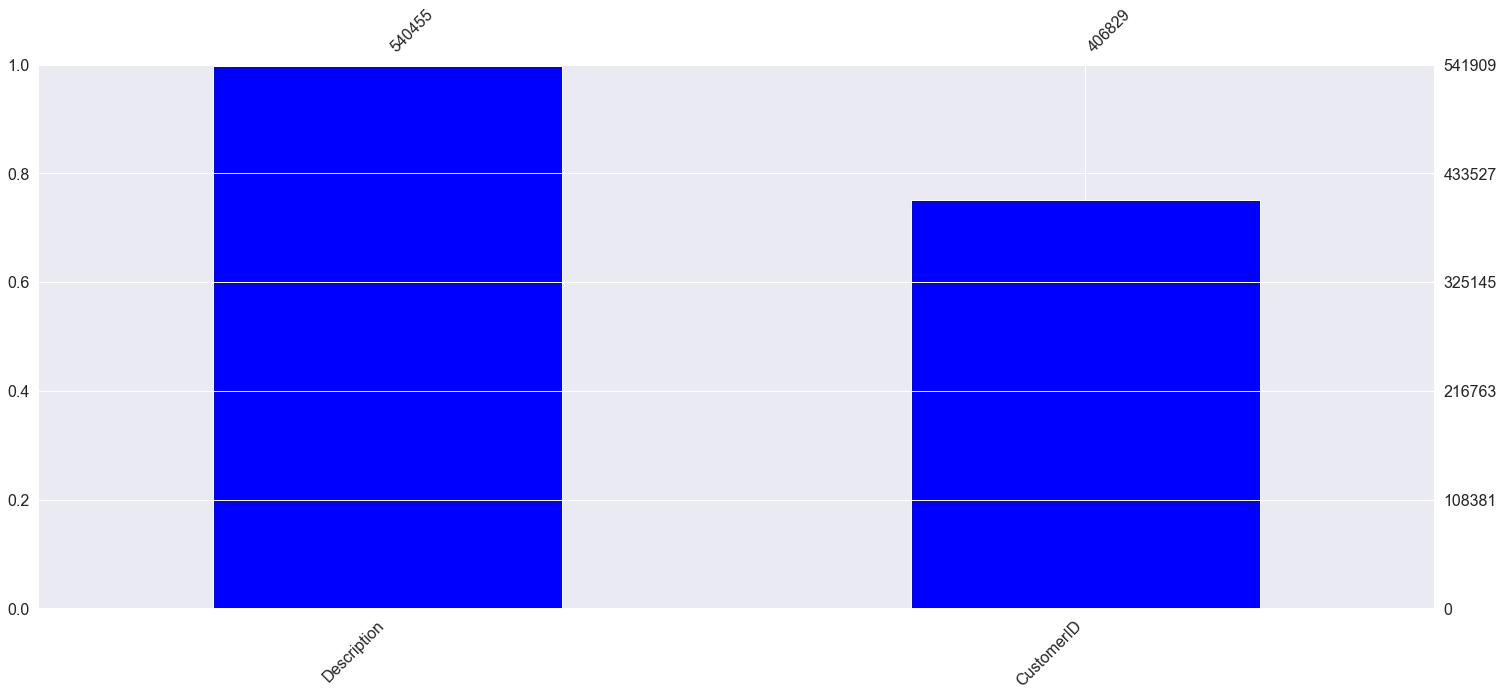

In [253]:
msno.bar(Filteredmvs, color= 'Blue')

In [254]:
#dropping the missing values - Note these missing values are irreplaceable so removing those would be more preferable.
df = df.dropna() 
df. count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

In [255]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [256]:
#detecting duplicates
duplicate_rows_df = df[df.duplicated()]
print( "number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5225, 8)


In [257]:
#dropping the duplicates - Note that this will eliminate the entire row that is duplicated in another row.
df.drop_duplicates(inplace=True)
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

<AxesSubplot:xlabel='Quantity'>

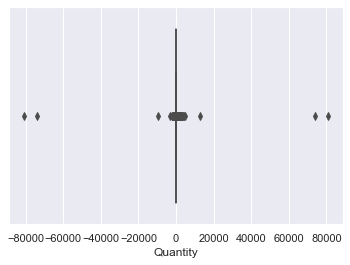

In [258]:
#Detecting Outliers
sns.boxplot(x= df["Quantity"])
#Assuming that negative quantity is used here to represent the number of orders that customers have either returned or cancelled.

<AxesSubplot:xlabel='Quantity'>

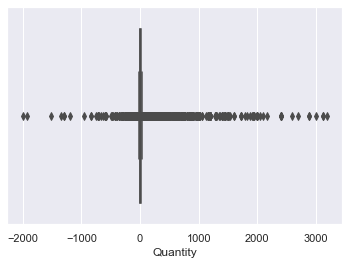

In [259]:
#Removing outliers from the dataset.
dfnew = df[df['Quantity'].between(-3000, 3500)]
sns.boxplot(x= dfnew["Quantity"])

In [260]:
dfnew['CustomerID']=dfnew.CustomerID.astype('int64')
dfnew.describe()

,Quantity,UnitPrice,CustomerID
count,401594.000000,401594.000000,401594.000000
mean,12.151026,3.474125,15281.176410
std,42.044531,69.764902,1713.996398
min,-2000.000000,0.000000,12347.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16787.000000
max,3186.000000,38970.000000,18287.000000


In [261]:
#Dropping all the cancelled or returned orders
dfnew = dfnew[dfnew['Quantity'] > 0]

In [262]:
dfnew.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [263]:
dfnew.describe() #min quantity is 1 which indicates that negative values have been removed.

,Quantity,UnitPrice,CustomerID
count,392726.000000,392726.000000,392726.000000
mean,12.693659,3.125631,15287.748967
std,41.385006,22.240893,1713.556872
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,3186.000000,8142.750000,18287.000000


In [264]:
#Calculating Sales by multiplying Quantity with Unit Price
dfnew['Sales'] = dfnew['Quantity'] * dfnew['UnitPrice']
dfnew.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [265]:
orders=dfnew.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
orders.head(6)

,CustomerID,Country,InvoiceNo
0,12347,Iceland,182
1,12348,Finland,31
2,12349,Italy,73
3,12350,Norway,17
4,12352,Norway,85
5,12353,Bahrain,4


In [266]:
dfnew[['Date','Time']] = dfnew.InvoiceDate.str.split(" ",expand=True,)
dfnew[['Month','Day', 'Year']] = dfnew.Date.str.split("/",expand=True,)
dfnew.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Time,Month,Day,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,12/1/2010,8:26,12,1,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,12/1/2010,8:26,12,1,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,12/1/2010,8:26,12,1,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,12/1/2010,8:26,12,1,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,12/1/2010,8:26,12,1,2010


In [267]:
dfnew['Year'].value_counts()

2011    367053
2010     25673
Name: Year, dtype: int64

6.5371276666174385

In [268]:
dfok = dfnew.sort_values(by = 'Month',ascending=True)
dfok.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Date,Time,Month,Day,Year
72226,542236,85049G,CHOCOLATE BOX RIBBONS,6,1/26/2011 14:19,1.25,17027,United Kingdom,7.50,1/26/2011,14:19,1,26,2011
49369,540514,22729,ALARM CLOCK BAKELIKE ORANGE,1,1/9/2011 11:43,3.75,15708,United Kingdom,3.75,1/9/2011,11:43,1,9,2011
49370,540514,22727,ALARM CLOCK BAKELIKE RED,1,1/9/2011 11:43,3.75,15708,United Kingdom,3.75,1/9/2011,11:43,1,9,2011
49371,540514,22728,ALARM CLOCK BAKELIKE PINK,1,1/9/2011 11:43,3.75,15708,United Kingdom,3.75,1/9/2011,11:43,1,9,2011
49372,540514,22457,NATURAL SLATE HEART CHALKBOARD,3,1/9/2011 11:43,2.95,15708,United Kingdom,8.85,1/9/2011,11:43,1,9,2011


([<matplotlib.axis.XTick at 0x23e95e8bbe0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

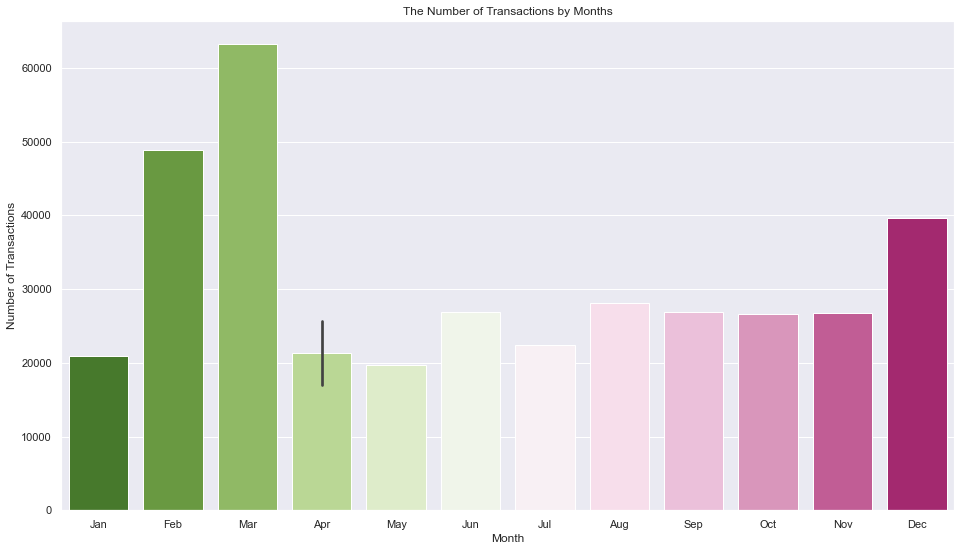

In [269]:
df1 = dfok.groupby(['Month', 'Year'], as_index=False) ["InvoiceNo"].count()
plt.figure(figsize=(16,9))
sns.barplot(df1.Month, df1. InvoiceNo, palette="PiYG_r")
plt.ylabel("Number of Transactions")
plt.title("The Number of Transactions by Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [ ]:
#The highest number of transactions occurred in November 2011.

In [ ]:
dfnew['Country'].value_counts(normalize=True).plot.bar(figsize=(12,3), color= 'green')
plt.ylabel("Number of Transactions")
plt.title("The Number of Transactions in Countries")
plt.show()